# **AutoML with PyCaret-classification**

[PyCaret](https://pycaret.org/): opern-source low-code machine learning library in Python that automates machine learning workflows.
Extra reading: [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

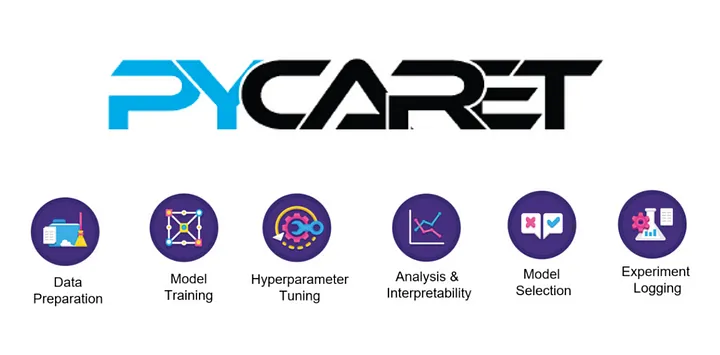

**Image source:** [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

[Dataset](): in-built dataset(Credit default) by PyCaret.

Task: [Classification](https://en.wikipedia.org/wiki/Regression_analysis), credit default.

**Import libraries:**

In [37]:
#!pip uninstall scipy
#!pip install scipy

In [ ]:
#!pip install pycaret
#!pip install -r requirements.txt
#!pip install -r requirements-optional.txt

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [8]:
# get the dataset
from pycaret.datasets import get_data

**Basic EDA and sanity check:**

In [9]:
# head (first 5 rows of the dataset)
df = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [10]:
# columns as list
df.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

In [11]:
# shape of the dataset
df.shape

(24000, 24)

In [12]:
# check datatypes
df.dtypes

LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [13]:
# check for missing values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

**After some sanity check and basic EDA we have get a sense of our dataset, now let's jump into the the nitty-gritty of [PyCaret](pycaret.org) for performing classification tasks**

In [14]:
# set features
features = df.drop('default', axis=1)

# target variable
targets = df['default']

In [16]:
# import
from pycaret.classification import models, setup, compare_models, create_model, tune_model, plot_model

In [17]:
%%time
# set our target
exp_clf = setup(data = df, target='default')
# evaluate criteria/metrics "accuracy")
best = compare_models(sort="Accuracy")

,Description,Value
0,Session id,3556
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8205,0.7764,0.3640,0.6744,0.4726,0.3759,0.4020,5.1290
lightgbm,Light Gradient Boosting Machine,0.8198,0.7742,0.3662,0.6692,0.4730,0.3754,0.4004,1.7240
ada,Ada Boost Classifier,0.8179,0.7692,0.3193,0.6908,0.4362,0.3448,0.3816,1.5770
rf,Random Forest Classifier,0.8140,0.7599,0.3602,0.6410,0.4608,0.3592,0.3811,4.2380
xgboost,Extreme Gradient Boosting,0.8138,0.7606,0.3686,0.6363,0.4664,0.3633,0.3833,0.3660
et,Extra Trees Classifier,0.8098,0.7527,0.3646,0.6177,0.4581,0.3521,0.3702,1.6960
lda,Linear Discriminant Analysis,0.8089,0.7165,0.2418,0.6951,0.3586,0.2761,0.3296,0.0820
ridge,Ridge Classifier,0.7970,0.0000,0.1333,0.7230,0.2248,0.1675,0.2490,0.1010
lr,Logistic Regression,0.7789,0.6454,0.0000,0.0000,0.0000,-0.0001,-0.0013,0.6530
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 15.2 s, sys: 541 ms, total: 15.8 s
Wall time: 3min 6s


###**Result:**
as you can see the best estimator is [Gradient Boosting Classifier (gbc)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) with an accuracy of 82.06% and and AUC of 0.7769 and F1-score and MCC of 0.4778, 0.4048 repectively.



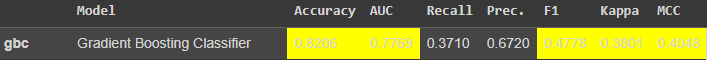

**Let's create the model:**

by passing the "gbc" string to the <code> create_model("gbc")</code>

In [18]:
%%time
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8238,0.7930,0.3801,0.6812,0.4879,0.3917,0.4160
1,0.8131,0.7672,0.3208,0.6575,0.4312,0.3348,0.3658
2,0.8220,0.7682,0.3585,0.6856,0.4708,0.3762,0.4048
3,0.8173,0.7860,0.3693,0.6524,0.4716,0.3712,0.3932
4,0.8238,0.7830,0.3720,0.6866,0.4825,0.3874,0.4139
5,0.8161,0.7484,0.3504,0.6566,0.4569,0.3583,0.3840
6,0.8173,0.7803,0.3468,0.6684,0.4566,0.3598,0.3878
7,0.8185,0.7658,0.3710,0.6603,0.4750,0.3756,0.3984
8,0.8292,0.7797,0.3763,0.7179,0.4938,0.4029,0.4333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 7.41 s, sys: 55.8 ms, total: 7.47 s
Wall time: 57.9 s


**Let's tune the model:**


In [19]:
%%time
# pass the created model
#tuned_gbc = tune_model(gbc)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


###**Analyze Model**

The reason for the train-test-split is to utilize the visualization capabilities of [Yellowbrick](www.scikit-yb.org) by scitit.

In [49]:
#Create the train and test data
X = features.copy()
y = targets.copy()

#train test split
from sklearn.model_selection import train_test_split as tts
""" note test size is based on the Autosplit value(Transformed test set shape	)"""
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)

**Plot Model Results:** AUC-ROC Curve

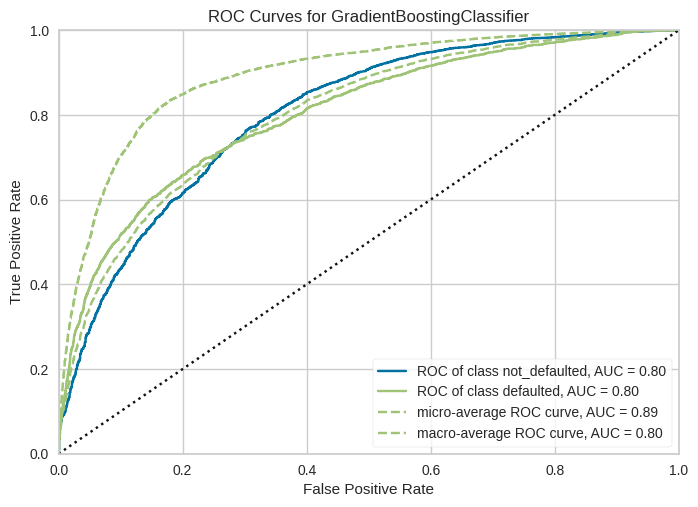

In [51]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(gbc, classes=['not_defaulted', 'defaulted'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and show the figure

**Learning Curve for the Gradient Boosting Classifier**

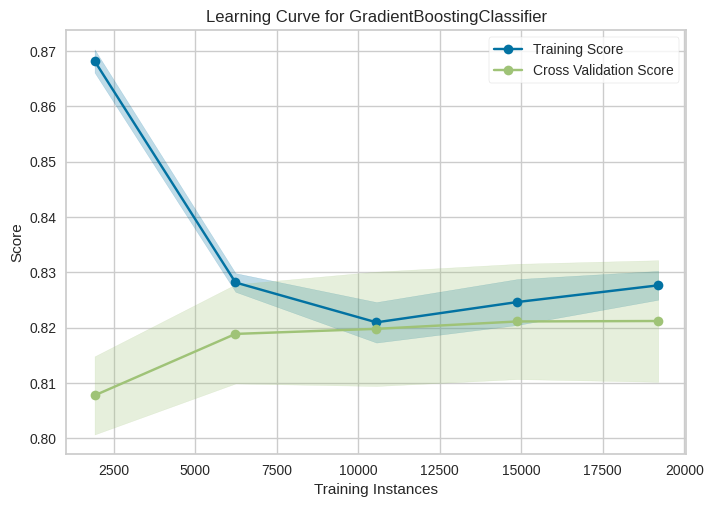

In [52]:
from yellowbrick.model_selection import LearningCurve
lc = LearningCurve(gbc, scoring='accuracy') #'f1_weighted'
lc.fit(features, targets)
lc.show();

**Confusion Matrix**

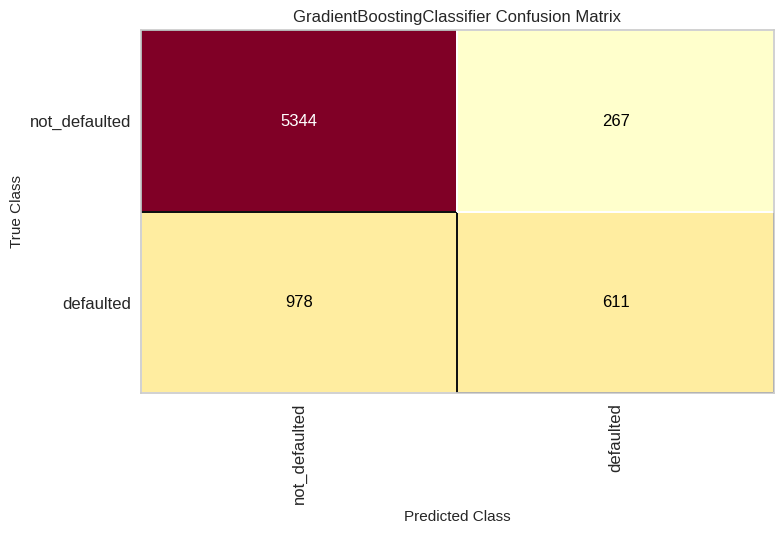

<Figure size 800x550 with 0 Axes>

In [53]:
# Instantiate the visualizer with the classification model
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    gbc,
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout();

**Classification report:**

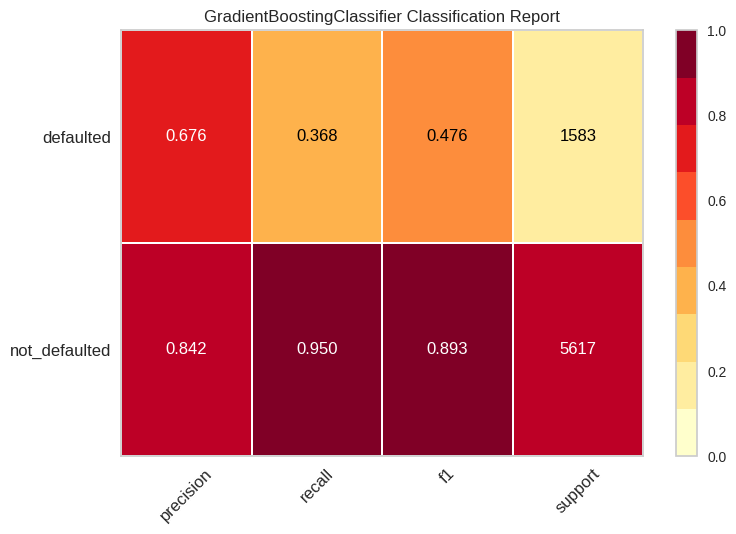

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [48]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classes=['not_defaulted', 'defaulted']
visualizer = ClassificationReport(gbc, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

###**Use the model to make predictions:**
<code>predict_model function from PyCaret:</code>

In [29]:
# import predict_model, save_model and load_model
from pycaret.classification import predict_model, save_model, load_model

**Use the predict_model function to return a dataFrame with all the values and the predicted values:**

Note: This will automatically apply any feature transformations that had been done during model selection, such as categorical to numeric conversions. This returns a DataFrame with the same features as the input features DataFrame, but now with a new Label column, which has the predictions. For regression, this simply provides the numeric prediction [from the book]().

In [30]:
prediction_df = predict_model(gbc, features)

In [31]:
# rename "prediction_label" to "default_predictions"
prediction_df.rename(columns={"prediction_label":"default_predictions"},
                  inplace=True,
                  errors='raise')

In [32]:
# overview of the newDataFrame
prediction_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_predictions,prediction_score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.7473
1,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.8895
2,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.8656
3,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.9033
4,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0.8275


**Once we have our optimized model, we can save it to a pickle file like so:**

In [33]:
save_model(best, 'Gradient_Boosting_Classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, los

**To load the model:**

In [34]:
gbc_model = load_model('Gradient_Boosting_Classifier')

Transformation Pipeline and Model Successfully Loaded


####**Further reading:** [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html), [Pycaret](https://pycaret.gitbook.io/docs/)
